In [26]:
from ott.geometry.graph import Graph
import scanpy as sc
from ott.core.sinkhorn import Sinkhorn
import numpy as np
from ott.core.linear_problems import LinearProblem

In [2]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022.h5ad")

In [23]:
graph = Graph(adata.obsp["connectivities"].A)

In [43]:
adata.obs["sample"].value_counts()

E14.5    9832
E15.5    7121
Name: sample, dtype: int64

In [51]:
a = np.zeros(adata.n_obs)
a[0:9832] = 1/9832

In [52]:
b = np.zeros(adata.n_obs)
b[9832:] = 1/7121

In [53]:
lp = LinearProblem(geom=graph, a=a, b=b)

In [54]:
res = Sinkhorn(lse_mode=False)(lp)

In [32]:
res.f.shape, res.g.shape

((16953,), (16953,))

In [33]:
import seaborn as sns

<AxesSubplot:>

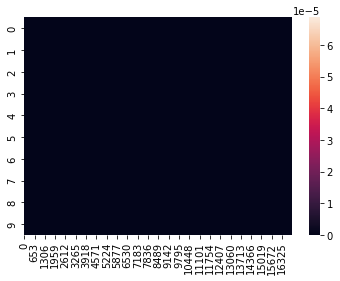

In [56]:
sns.heatmap(res.matrix[:10,])

In [57]:
np.unique(res.matrix[0,], return_counts=True)

(array([0.0000000e+00, 9.8511282e-43, 1.1897024e-42, ..., 4.8147085e-06,
        6.7633141e-06, 1.4381095e-05], dtype=float32),
 array([11892,     1,     1, ...,     1,     1,     1]))

In [58]:
np.where(res.matrix[0,]!=0.0)

(array([ 9832,  9833,  9834, ..., 16949, 16950, 16952]),)

In [61]:
sns.heatmap(res.matrix[9832:,0].squeeze())

IndexError: Inconsistent shape between the condition and the input (got (7121, 1) and (7121,))